## A Neural Network for the Digits Dataset


<br><br>

### Introduction

<br>
<img width="60%" class="imgright" src="../images/sklearn_digits_intro_image.webp" srcset="../images/sklearn_digits_intro_image_700w.webp 700w,../images/sklearn_digits_intro_image_600w.webp 600w,../images/sklearn_digits_intro_image_500w.webp 500w,../images/sklearn_digits_intro_image_400w.webp 400w,../images/sklearn_digits_intro_image_350w.webp 350w,../images/sklearn_digits_intro_image_300w.webp 300w" alt="Digits Intro Image" />

The Python module `sklear` contains a dataset with handwritten digits. It is just one of many datasets which `sklearn` provides, as we show in our chapter [Representation and Visualization of Data](machine_learning_data_visualization.php). In this chapter of our Machine Learning tutorial we will demonstrate how to create a neural network for the digits dataset to recognize these digits. This example is accompanying the theoretical introductions of our previous chapters to give a practical view. You will see that hardly any Python code is needed to accomplish the actual classification and recognition task. 

We will first load the digits data:

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

We can get an overview of what is contained in the dataset with the `keys` method:

In [3]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

The digits dataset contains 1797 images and each images contains 64 features, which correspond to the pixels:

In [4]:
n_samples, n_features = digits.data.shape
print((n_samples, n_features))

(1797, 64)


In [5]:
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [6]:
print(digits.target)

[0 1 2 ... 8 9 8]


The data is also available at digits.images. This is the raw data of the images in the form of 8 lines and 8 columns.

With "data" an image corresponds to a one-dimensional Numpy array with the length 64, and "images" representation contains 2-dimensional numpy arrays with the shape (8, 8) 

In [7]:
print("Shape of an item: ", digits.data[0].shape)
print("Data type of an item: ", type(digits.data[0]))
print("Shape of an item: ", digits.images[0].shape)
print("Data tpye of an item: ", type(digits.images[0]))

Shape of an item:  (64,)
Data type of an item:  <class 'numpy.ndarray'>
Shape of an item:  (8, 8)
Data tpye of an item:  <class 'numpy.ndarray'>


Let's visualize the data:

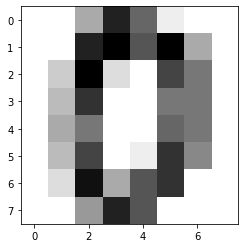

In [8]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[0], cmap='binary')
plt.show()

Let's visualize some more digits combined with their labels:

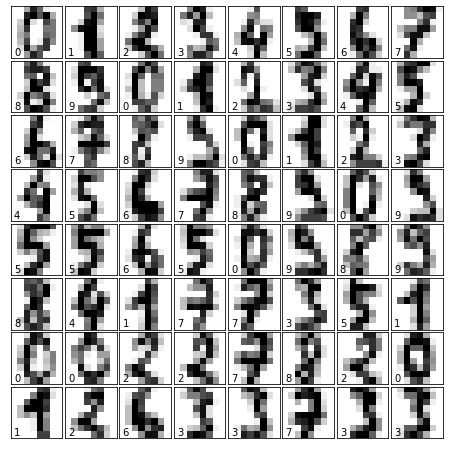

In [9]:
import matplotlib.pyplot as plt
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

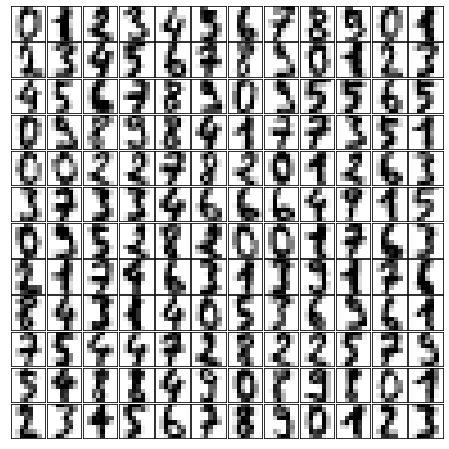

In [13]:
import matplotlib.pyplot as plt
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(144):
    ax = fig.add_subplot(12, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    #ax.text(0, 7, str(digits.target[i]))

In [13]:
from sklearn.model_selection import train_test_split


res = train_test_split(digits.data, digits.target, 
                       train_size=0.8,
                       test_size=0.2,
                       random_state=1)
train_data, test_data, train_labels, test_labels = res 


In [51]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(5,), 
                    activation='logistic', 
                    alpha=1e-4,
                    solver='sgd', 
                    tol=1e-4,
                    random_state=1,
                    learning_rate_init=.3, 
                    verbose=True)

In [52]:
mlp.fit(train_data, train_labels)

Iteration 1, loss = 2.25145782
Iteration 2, loss = 1.97730357
Iteration 3, loss = 1.66620880
Iteration 4, loss = 1.41353830
Iteration 5, loss = 1.29575643
Iteration 6, loss = 1.06663573
Iteration 7, loss = 0.95558862
Iteration 8, loss = 0.94767318
Iteration 9, loss = 0.95242867
Iteration 10, loss = 0.83577430
Iteration 11, loss = 0.74541414
Iteration 12, loss = 0.72011102
Iteration 13, loss = 0.70790928
Iteration 14, loss = 0.69425700
Iteration 15, loss = 0.74458525
Iteration 16, loss = 0.67779333
Iteration 17, loss = 0.69691846
Iteration 18, loss = 0.67844516
Iteration 19, loss = 0.68164743
Iteration 20, loss = 0.68435917
Iteration 21, loss = 0.61988051
Iteration 22, loss = 0.61362164
Iteration 23, loss = 0.56615517
Iteration 24, loss = 0.61323269
Iteration 25, loss = 0.56979209
Iteration 26, loss = 0.58189564
Iteration 27, loss = 0.50692207
Iteration 28, loss = 0.65956191
Iteration 29, loss = 0.53736180
Iteration 30, loss = 0.66437126
Iteration 31, loss = 0.56201738
Iteration 32, los

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5,), learning_rate='constant',
       learning_rate_init=0.3, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [53]:
predictions = mlp.predict(test_data)
predictions[:25] , test_labels[:25]


(array([1, 5, 0, 7, 7, 0, 6, 1, 5, 4, 9, 2, 7, 8, 4, 1, 7, 3, 7, 4, 7, 4,
        8, 6, 0]),
 array([1, 5, 0, 7, 1, 0, 6, 1, 5, 4, 9, 2, 7, 8, 4, 6, 9, 3, 7, 4, 7, 1,
        8, 6, 0]))

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, predictions)

0.725

In [56]:
for i in range(5, 30):
    mlp = MLPClassifier(hidden_layer_sizes=(i,), 
                        activation='logistic', 
                        random_state=1,
                        alpha=1e-4,
                        solver='sgd', 
                        tol=1e-4,
                        learning_rate_init=.3, 
                        verbose=False)
    mlp.fit(train_data, train_labels)
    predictions = mlp.predict(test_data)
    acc_score = accuracy_score(test_labels, predictions)
    print(i, acc_score)

5 0.725
6 0.37222222222222223
7 0.8166666666666667
8 0.8666666666666667
9 0.8805555555555555
10 0.925
11 0.9388888888888889
12 0.9388888888888889
13 0.9388888888888889
14 0.9527777777777777
15 0.9305555555555556
16 0.95
17 0.8916666666666667
18 0.8638888888888889


/home/bernd/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


19 0.9555555555555556
20 0.9638888888888889
21 0.9722222222222222
22 0.9611111111111111
23 0.9444444444444444
24 0.9583333333333334
25 0.9305555555555556
26 0.9722222222222222
27 0.9694444444444444
28 0.975
29 0.9611111111111111


In [17]:
from sklearn.model_selection import GridSearchCV

In [19]:
param_grid = [
        {
            'activation' : ['identity', 'logistic', 'tanh', 'relu'],
            'solver' : ['lbfgs', 'sgd', 'adam'],
            'hidden_layer_sizes': [
             (1,),(2,),(3,),(4,),(5,),(6,),(7,),(8,),(9,),(10,),(11,), (12,),(13,),(14,),(15,),(16,),(17,),(18,),(19,),(20,),(21,)
             ]
        }
       ]

In [ ]:
clf = GridSearchCV(MLPClassifier(), param_grid, cv=3,
                           scoring='accuracy')
clf.fit(train_data, train_labels)


print("Best parameters set found on development set:")
print(clf.best_params_)

/home/bernd/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/bernd/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/bernd/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/bernd/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.